In [1]:
import iris
import iris.quickplot as qplt
import iris.plot as iplt
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs

In [2]:
km2p2_wind_data = '/scratch/rwjones/Kscale/updating_SSTs/winds_300hPa/20171230T0600Z_KSCALE1_updating_sst_km2p2_ra3p3_ra3p3_pverc*.pp'
Africa_wind_data = '/scratch/rwjones/Kscale/updating_SSTs/winds_300hPa/20171230T0600Z_KSCALE1_updating_sst_Africa_2p2_ral3_ra3_p3_pverc*.pp'
km2p2_temp_data = "/scratch/rwjones/Kscale/updating_SSTs/profile_data/km2p2_chan/20171230T0600Z_KSCALE1_updating_sst_km2p2_ra3p3_ra3p3_pverd*.pp"
Africa_temp_data = "/scratch/rwjones/Kscale/updating_SSTs/profile_data/Africa/20171230T0600Z_KSCALE1_updating_sst_Africa_2p2_ral3_ra3_p3_pverd*.pp"
km12_data = "/scratch/rwjones/Kscale/updating_SSTs/profile_data/km12_chan/20171230T0600Z_KSCALE1_updating_sst_km12_ga7_pverd*.pp"

In [3]:
latitude_constraint = iris.Constraint(latitude = lambda cell: -36.95 <= cell <= 10.95)
longitude_constraint = iris.Constraint(longitude = lambda cell: 347.05 <= cell <= 414.95)
pressure_constraint = iris.Constraint(pressure = 300)

In [4]:
# Load in the cubes
## Wind
channel_uwind = iris.load_cube(km2p2_wind_data, 'x_wind' & latitude_constraint & longitude_constraint)
channel_vwind = iris.load_cube(km2p2_wind_data, 'y_wind' & latitude_constraint & longitude_constraint)
Africa_uwind = iris.load_cube(Africa_wind_data, 'x_wind' & latitude_constraint & longitude_constraint)
Africa_vwind = iris.load_cube(Africa_wind_data, 'y_wind' & latitude_constraint & longitude_constraint)

## Temperature
air_temp_channel = iris.load_cube(km2p2_temp_data, 'air_temperature' & latitude_constraint & longitude_constraint & pressure_constraint)
air_temp_africa = iris.load_cube(Africa_temp_data, 'air_temperature' & latitude_constraint & longitude_constraint & pressure_constraint)

# Create a list of cubes
cube_list = [channel_uwind, channel_vwind, Africa_uwind, Africa_vwind, air_temp_channel, air_temp_africa]

In [6]:
print(channel_uwind.summary(shorten = True))
print(channel_vwind.summary(shorten = True))
print(Africa_uwind.summary(shorten = True))
print(Africa_uwind.summary(shorten = True))
print(air_temp_channel.summary(shorten = True))
print(air_temp_africa.summary(shorten = True))

x_wind / (m s-1)                    (time: 97; latitude: 2395; longitude: 3395)
y_wind / (m s-1)                    (time: 97; latitude: 2395; longitude: 3395)
x_wind / (m s-1)                    (time: 97; latitude: 2395; longitude: 3395)
x_wind / (m s-1)                    (time: 97; latitude: 2395; longitude: 3395)
air_temperature / (K)               (time: 97; latitude: 2395; longitude: 3395)
air_temperature / (K)               (time: 97; latitude: 2395; longitude: 3395)


In [7]:
# Regrid the cubes
def coord_check(cube):
    cube.coord('longitude').guess_bounds()
    cube.coord('latitude').guess_bounds()
    cube.coord('longitude').coord_system=iris.coord_systems.GeogCS(6371229.0)
    cube.coord('latitude').coord_system=iris.coord_systems.GeogCS(6371229.0)

# Do the re-gridding
km12_mask = iris.load_cube(km12_data,'air_temperature' & longitude_constraint & latitude_constraint)
coord_check(km12_mask)

for cube in cube_list:
    coord_check(cube)

In [8]:
channel_uwind = channel_uwind.regrid(km12_mask,iris.analysis.AreaWeighted())
channel_vwind = channel_vwind.regrid(km12_mask,iris.analysis.AreaWeighted())
Africa_uwind = Africa_uwind.regrid(km12_mask,iris.analysis.AreaWeighted())
Africa_vwind = Africa_vwind.regrid(km12_mask,iris.analysis.AreaWeighted())
air_temp_channel = air_temp_channel.regrid(km12_mask,iris.analysis.AreaWeighted())
air_temp_africa = air_temp_africa.regrid(km12_mask, iris.analysis.AreaWeighted())

difference_uwind = channel_uwind - Africa_uwind
difference_vwind = channel_vwind - Africa_vwind
temp_difference = air_temp_channel - air_temp_africa

In [50]:
# Now create daily subcubes and calculate their means

numbers = range(0,95,8)

uwind_days = []
vwind_days = []
temp_days = []

for i in numbers:
    uwind_days.append(difference_uwind[i:i+8, :, :].collapsed('time', iris.analysis.MEAN))
    vwind_days.append(difference_vwind[i:i+8, :, :].collapsed('time', iris.analysis.MEAN))
    temp_days.append(temp_difference[i:i+8, :, :].collapsed('time', iris.analysis.MEAN))


/home/h02/jmacholl/.conda/envs/kscale/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/h02/jmacholl/.conda/envs/kscale/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/home/h02/jmacholl/.conda/envs/kscale/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/h02/jmacholl/.conda/envs/kscale/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/home/h02/jmacholl/.conda/envs/kscale/lib/python3.

[<iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>, <iris 'Cube' of unknown / (m s-1) (latitude: 436; longitude: 617)>]


/home/h02/jmacholl/.conda/envs/kscale/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/home/h02/jmacholl/.conda/envs/kscale/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))


In [49]:
# Do the plots

for i in range(len(uwind_days)):
    iplt.pcolormesh(temp_days[i], cmap='RdBu_r', vmin = -4, vmax = 4)
    plt.colorbar(label='temperature difference $^\circ$C', orientation='horizontal', location = 'bottom', ticks = np.linspace(-4, 4, 5))
    q = iplt.quiver(uwind_days[i][::20,::20], vwind_days[i][::20,::20], pivot='middle', angles = 'xy', units = 'xy', scale = 5) # Set arrow length-scale to 5 times the data values
    plt.gca().gridlines(draw_labels=True,xlocs=range(-90,90,15),ylocs=range(-90,90,15),linestyle='--') # The length of quiver key is too small with 5 units, so increase by factor 4
    plt.quiverkey(q, X=-0.1, Y=-0.13, U = 20, label = "20 m/s")
    plt.gca().coastlines()
    plt.title(f'Channel - LAM temperature and wind differences, Day {i}, 300 hpa')
    #plt.show()
    plt.savefig(f'/home/h02/jmacholl/Documents/RMED/k-scale/plotting/geospatial_wind/snapshots/Day_{i}')
    plt.close()

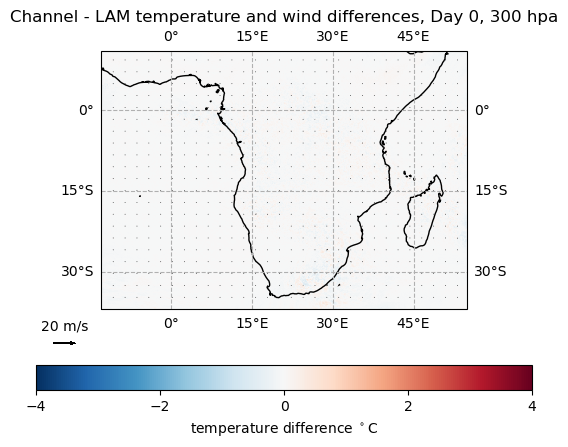

In [40]:
# Use this cell if you want to make edits to one of the plots and 'test' them
iplt.pcolormesh(day_0_temp_difference_mean, cmap='RdBu_r', vmin = -4, vmax = 4)
plt.colorbar(label='temperature difference $^\circ$C', orientation='horizontal', location = 'bottom', ticks = np.linspace(-4, 4, 5))
q = iplt.quiver(day_0_uwind_mean[::20,::20], day_0_vwind_mean[::20,::20], pivot='middle', angles = 'xy', units = 'xy', scale = 5) # Set arrow length-scale to 5 times the data values
plt.gca().gridlines(draw_labels=True,xlocs=range(-90,90,15),ylocs=range(-90,90,15),linestyle='--') # The length of quiver key is too small with 5 units, so increase by factor 4
plt.quiverkey(q, X=-0.1, Y=-0.13, U = 20, label = "20 m/s")
plt.gca().coastlines()
plt.title('Channel - LAM temperature and wind differences, Day 0, 300 hpa')
plt.show()